In [7]:
folder_path = "D:\\source\\lucaspimentel\\pdf-text-analysis\\output\\xpdf"
key_doc_path = "D:\\source\\lucaspimentel\\pdf-text-analysis\\output\\WHO Global Action Plan on AMR.txt"
model_name = 'all-mpnet-base-v2' # 'all-MiniLM-L6-v2'

Key Document: WHO Global Action Plan on AMR.txt
Loaded 150 documents from D:\source\lucaspimentel\pdf-text-analysis\output\xpdf.
"Afghanistan 2017-2021",0.5622
"Albania 2018-2022",0.5433
"Algeria 2024-2028",0.5866
"Argentina 2015",0.4523
"Australia 2015-2019",0.6580
"Australia 2020-2040",0.6627
"Austria 2021-2024",0.5983
"Bahrain 2018-2019",0.6329
"Bangladesh 2017-2022",0.5498
"Barbados 2017-2022",0.6341
"Belgium 2020-2024",0.5226
"Benin 2019-2024",0.4322
"Bhutan 2018-2022",0.5902
"Brazil 2018-2022",0.6805
"Brunei 2019-2023",0.4959
"Burkina Faso 2017-2020",0.4461
"Burundi 2020-2023",0.5438
"Cabo Verde 2018-2022",0.5636
"Cambodia 2019-2023",0.2121
"Cameroon 2018-2020",0.4513
"Cameroon 2021-2023",0.4351
"Canada 2023-2027",0.6075
"Canada AMR NAP.txt",0.5435
"Chad 2018",0.3580
"Chile 2021-2025",0.6442
"China 2016-2020",0.6024
"China 2022-2025",0.5545
"Colombia 2018-2019",0.6193
"Comoros 2022-2026",0.4136
"Cook Islands 2016-2020",0.5740
"Costa Rica 2018-2022",0.5314
"Cote d'Ivoire 2021-2025

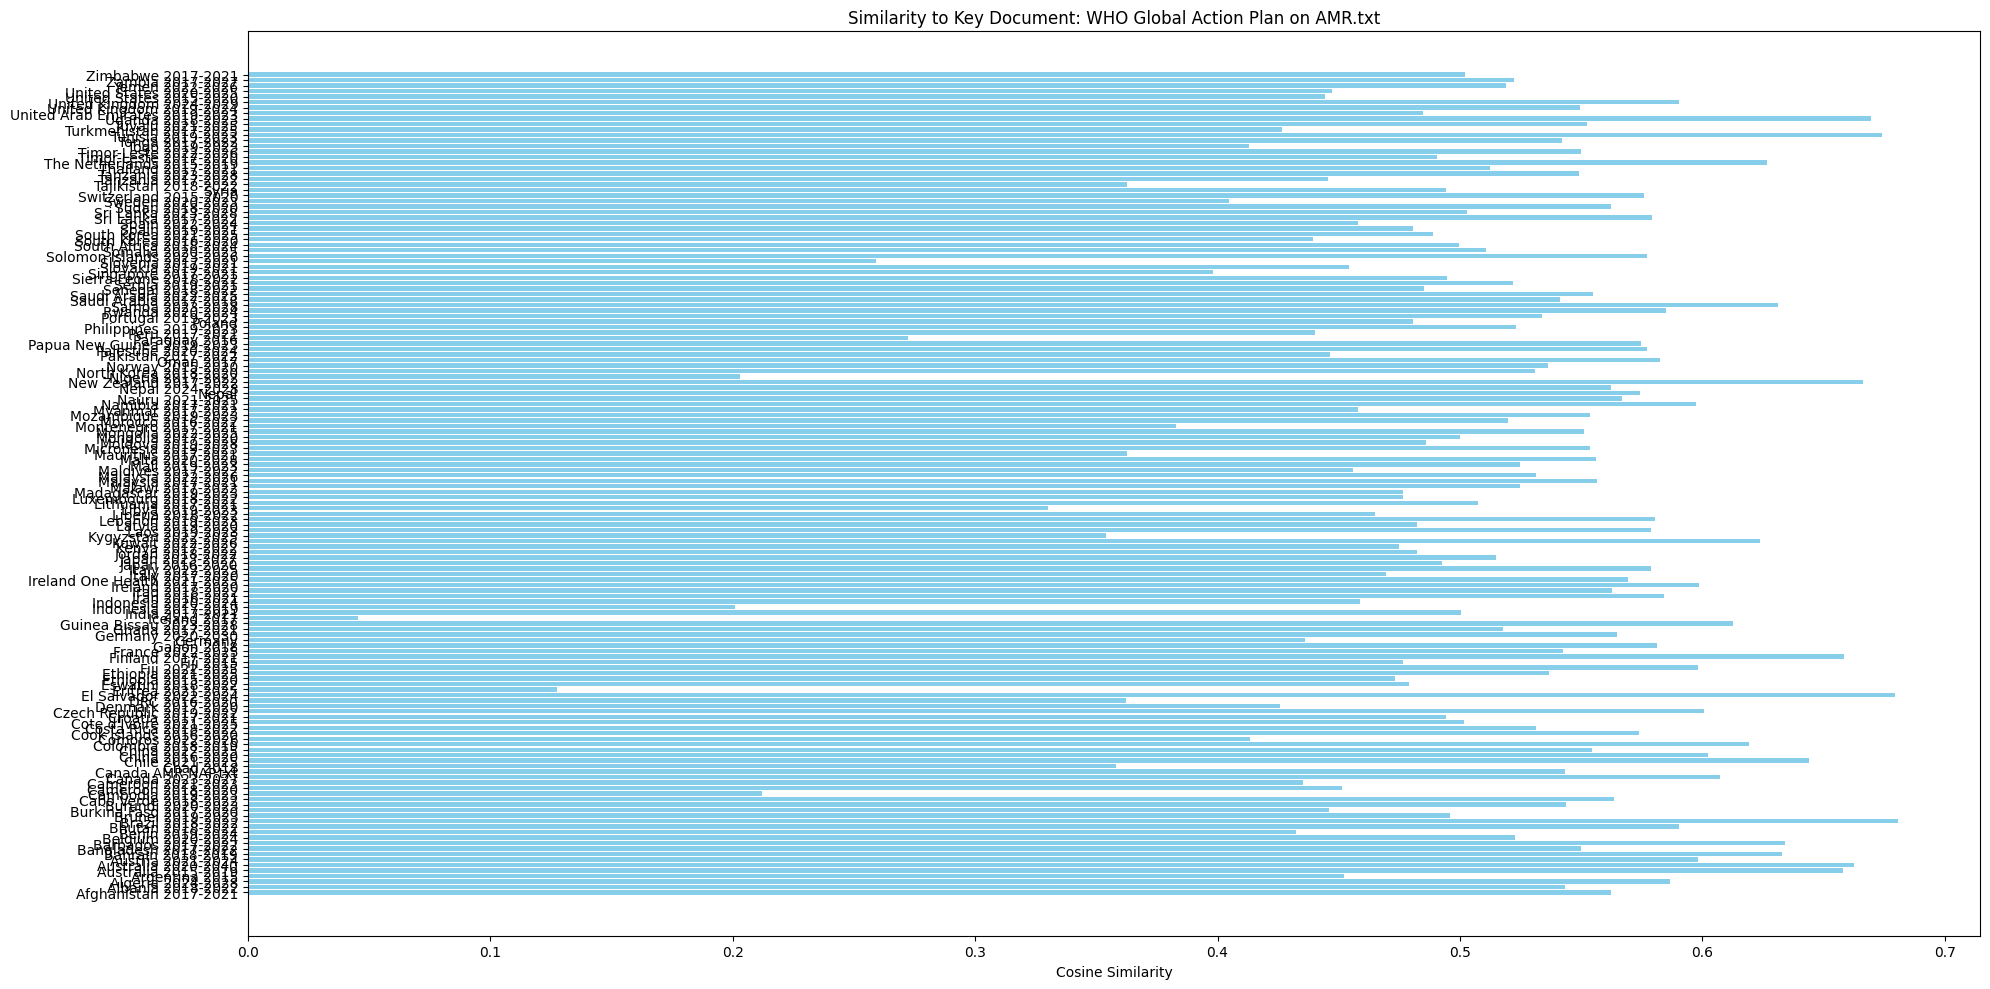

In [8]:
import os
import re
from sentence_transformers import SentenceTransformer, util
import numpy as np
import matplotlib.pyplot as plt


# ------------------------------
# 2) Function to simplify filenames
# ------------------------------
def simplify_filename(filename: str) -> str:
    """
    Extracts just the country name and the year range (or single year) from a filename.
    
    Examples:
      "Afghanistan AMR NAP (2017-2021).txt" => "Afghanistan 2017-2021"
      "Algeria AMR NAP (2024-2028) English Translation.txt" => "Algeria 2024-2028"
      "Argentina AMR NAP [2015] English Translation.txt" => "Argentina 2015"
      "Cambodia AMR NAP (2019-2023) English Translation (WOAH version).txt" => "Cambodia 2019-2023"
      "Cook Islands AMR NAP (2016-2020).txt" => "Cook Islands 2016-2020"
    """
    match = re.match(r"(.+) AMR NAP (\((\d{4}-\d{4})\)|\[(\d{4})\])?.+", filename)
    if match:
        country = match.group(1).strip()
        year = match.group(3).strip() if match.group(3) else match.group(4).strip() if match.group(4) else ""
    else:
        country = filename.strip()
        year = ""
    
    return f"{country} {year}".strip()

# ------------------------------
# 3) Load the key document
# ------------------------------
with open(key_doc_path, 'r', encoding='utf-8') as f:
    key_text = f.read()
key_doc_name = simplify_filename(os.path.basename(key_doc_path))
print(f"Key Document: {key_doc_name}")

# ------------------------------
# 4) Load all other documents and simplify their filenames
# ------------------------------
documents = []
file_list = []  # simplified filenames for output

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
        documents.append(text)
        file_list.append(simplify_filename(filename))

print(f"Loaded {len(documents)} documents from {folder_path}.")

# ------------------------------
# 5) Load a Sentence-BERT model and compute embeddings
# ------------------------------
model_name = 'all-MiniLM-L6-v2'  # you can choose a different model if needed
model = SentenceTransformer(model_name)

# Compute embedding for the key document
key_embedding = model.encode(key_text, convert_to_tensor=True)

# Compute embeddings for all other documents
embeddings = model.encode(documents, convert_to_tensor=True)

# ------------------------------
# 6) Compute cosine similarity between key document and each document
# ------------------------------
similarities = util.cos_sim(key_embedding, embeddings).cpu().numpy().flatten()

# Print out similarity scores
for fname, sim in zip(file_list, similarities):
    print(f"\"{fname}\",{sim:.4f}")

# ------------------------------
# 7) (Optional) Visualize the similarity scores in a bar chart
# ------------------------------
plt.figure(figsize=(20, 10))
plt.barh(file_list, similarities, color='skyblue')
plt.xlabel("Cosine Similarity")
plt.title(f"Similarity to Key Document: {key_doc_name}")
plt.tight_layout()
plt.show()
